# Gender Differences in Job Satisfaction in the Hospital Industry                   



## Introduction            

We analyzed the relationship between gender and job satisfaction within the hospital industry using the General Social Survey (GSS) data. The GSS is one of the most comprehensive sociological surveys in the United States, conducted since 1972, providing valuable insights into American society's attitudes, behaviors, and attributes.
The ethical considerations for this analysis include respecting the privacy of the original respondents by working with anonymized data, acknowledging the historical context in which the data was collected, and being mindful of potential biases in both the original data and our contemporary interpretation. The hospital industry has historically shown gender disparities in roles, opportunities, and compensation, making it an important sector for examining gender-based differences in job satisfaction over time.

In [10]:
# 1. Reading the data using pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("GSS-project-1-data.csv", index_col=0)
display(df.head())

,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
0,1972,1,1.0,NaN,NaN,NaN,205.0,50.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4446,NaN
1,1972,2,5.0,NaN,NaN,1.0,441.0,45.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
2,1972,3,2.0,NaN,NaN,NaN,270.0,44.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
3,1972,4,1.0,NaN,NaN,NaN,1.0,57.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN
4,1972,5,7.0,NaN,NaN,1.0,385.0,40.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8893,NaN


## Data Subset Description 

For this analysis, we focused on four key variables from the GSS dataset:

year: The survey year

sex: The respondent's gender (coded as 1 for male, 2 for female)

industry: The respondent's industry code, filtered specifically for code 838 (hospitals)

satjob: Job satisfaction measured on a scale of 1-4 (1=Very Satisfied, 4=Very Dissatisfied)

This subset was selected to examine gender differences in job satisfaction specifically within the hospital industry. We decided to narrow in on this specific industry due to the fact it had the greatest number of responses giving us more accurate analysis. We thought by looking at one specific industry it can provide a little bit of control in our analysis in terms of comparing job satisfaction overtime between male and female hospital workers. 


In [70]:
# 2. Define a helper function to clean and prepare the data
def prepare_hospital_data(dataframe, industry_code=838):
    """
    Hospital industry
    
    Parameters:
    dataframe : pandas.DataFrame
        The original GSS dataset
    industry_code : int
        The industry code to filter by (default is 838 for hospitals)
        
    Returns:
    pandas.DataFrame
        Filtered and prepared dataset
    """
    #Using .loc to filter data
    hospital_df = dataframe.loc[dataframe['industry'] == industry_code, ['year', 'sex', 'satjob']].copy()
    
    #Using utility method - dropna to remove missing values
    hospital_df = hospital_df.dropna()
    
    #Using utility method - astype to ensure correct data types
    hospital_df['year'] = hospital_df['year'].astype(int)
    hospital_df['sex'] = hospital_df['sex'].astype(int)
    hospital_df['satjob'] = hospital_df['satjob'].astype(int)
    
    #Using utility method - rename columns for clarity
    hospital_df = hospital_df.rename(columns={'sex': 'gender', 'satjob': 'job_satisfaction'})
    
    #Using apply to transform variables
    hospital_df['gender_label'] = hospital_df['gender'].apply(lambda x: 'Male' if x == 1 else 'Female')
    
    #values for job satisfaction
    satisfaction_map = {1: 'Very Satisfied', 2: 'Moderately Satisfied', 
                        3: 'A Little Dissatisfied', 4: 'Very Dissatisfied'}
    hospital_df['satisfaction_label'] = hospital_df['job_satisfaction'].apply(lambda x: satisfaction_map.get(x, 'Unknown'))

    print(f"{'Variable':<20}{'Data Type':<15}{'Example Values':<45}")
    print(f"{'-'*20}{'-'*15}{'-'*45}")
    
    for col in hospital_df.columns:
        data_type = str(hospital_df[col].dtype)
        examples = hospital_df[col].unique()[:3]
        examples_str = ', '.join([str(ex) for ex in examples])
        print(f"{col:<20}{data_type:<15}{examples_str:<45}")
    
    print("="*80 + "\n")
    
    return hospital_df

# Apply the helper function to prepare the data
hospital_data = prepare_hospital_data(df)

(hospital_data.head()) 


Variable            Data Type      Example Values                               
--------------------------------------------------------------------------------
year                int64          1972, 1973, 1974                             
gender              int64          2, 1                                         
job_satisfaction    int64          1, 4, 2                                      
gender_label        object         Female, Male                                 
satisfaction_label  object         Very Satisfied, Very Dissatisfied, Moderately Satisfied



,year,gender,job_satisfaction,gender_label,satisfaction_label
31,1972,2,1,Female,Very Satisfied
89,1972,2,4,Female,Very Dissatisfied
152,1972,2,1,Female,Very Satisfied
167,1972,2,2,Female,Moderately Satisfied
223,1972,2,3,Female,A Little Dissatisfied


## Data Exploration        

There are more than 4x more female responses than male responses so for further analysis we would want to control for that and have an equal number of male and female responses for more accurate analysis. 

In [71]:
# 3. Use pandas groupby with aggregation methods

# Group by year and gender to see job satisfaction trends
satisfaction_by_year_gender = hospital_data.groupby(['year', 'gender_label'])['job_satisfaction'].agg(['mean', 'count'])

#Using utility method - reset_index
satisfaction_by_year_gender = satisfaction_by_year_gender.reset_index()

print("\nJob Satisfaction by Year and Gender:")
display(satisfaction_by_year_gender.head())  

# Calculate overall statistics by gender
gender_stats = hospital_data.groupby('gender_label')['job_satisfaction'].agg(['mean', 'median', 'std', 'count'])

#Using utility method - sort_values
gender_stats = gender_stats.sort_values(by='mean')

print("\nOverall Job Satisfaction Statistics by Gender:")
display(gender_stats)



Job Satisfaction by Year and Gender:


,year,gender_label,mean,count
0,1972,Female,1.913043,23
1,1972,Male,1.400000,5
2,1973,Female,1.647059,34
3,1973,Male,1.769231,13
4,1974,Female,1.488372,43



Overall Job Satisfaction Statistics by Gender:


,mean,median,std,count
gender_label,,,,
Female,1.635538,1.0,0.786729,771
Male,1.751773,2.0,0.887662,141


In [72]:
# 4. helper function for yearly analysis
def analyze_yearly_gender_counts(data):
    """
    Analyze respondent counts by gender for each available year.
    
    Parameters:
    data : pandas.DataFrame
        Prepared hospital industry dataset
        
    Returns:
    tuple of pandas.DataFrame
        Male and female yearly counts for plotting
    """
    years = sorted(data['year'].unique())
    
    #DataFrames to store results for each gender
    male_counts = pd.DataFrame(columns=['year', 'number'])
    female_counts = pd.DataFrame(columns=['year', 'number'])
    
    #Count respondents by gender for each year
    for year in years:
        #Using .loc to filter by year
        year_data = data.loc[data['year'] == year]
        
        #Count males and females
        male_count = year_data[year_data['gender_label'] == 'Male'].shape[0]
        female_count = year_data[year_data['gender_label'] == 'Female'].shape[0]
        
        #Add to respective DataFrames
        male_counts = pd.concat([male_counts, pd.DataFrame({'year': [year], 'number': [male_count]})])
        female_counts = pd.concat([female_counts, pd.DataFrame({'year': [year], 'number': [female_count]})])
    
    #Using utility method - sort_values
    male_counts = male_counts.sort_values(by='year').reset_index(drop=True)
    female_counts = female_counts.sort_values(by='year').reset_index(drop=True)
    
    return male_counts, female_counts

hospitals1_sorted, hospitals2_sorted = analyze_yearly_gender_counts(hospital_data)

print("\nMale Respondent Counts by Year:")
display(hospitals1_sorted.head()) 

print("\nFemale Respondent Counts by Year:")
display(hospitals2_sorted.head())  


Male Respondent Counts by Year:


,year,number
0,1972,5
1,1973,13
2,1974,9
3,1975,6
4,1976,4



Female Respondent Counts by Year:


,year,number
0,1972,23
1,1973,34
2,1974,43
3,1975,52
4,1976,42


In [87]:
# 5.satisfaction by year
def analyze_yearly_gender_satisfaction(data):
    """
    Analyze satisfaction distribution by gender for each available year.
    
    Parameters:
    data : pandas.DataFrame
        Prepared hospital industry dataset
        
    Returns:
    pandas.DataFrame
        Yearly satisfaction means by gender
    """

    years = sorted(data['year'].unique())
    
    results = []
    
    for year in years:
        #Using .loc to filter by year
        year_data = data.loc[data['year'] == year]
        
        #years with enough data for both genders
        male_count = year_data[year_data['gender_label'] == 'Male'].shape[0]
        female_count = year_data[year_data['gender_label'] == 'Female'].shape[0]
        
        #insufficient data
        if male_count < 5 or female_count < 5:
            continue
            
        #satisfaction means by gender
        gender_means = year_data.groupby('gender_label')['job_satisfaction'].mean().reset_index()
        
        #year column
        gender_means['year'] = year
        
        #counts
        gender_means['count'] = gender_means['gender_label'].apply(
            lambda x: male_count if x == 'Male' else female_count
        )
        
        results.append(gender_means)
  
    if results:
        combined_results = pd.concat(results)
        
        #Using utility method - sort_values
        combined_results = combined_results.sort_values(by=['year', 'gender_label'])
        
        return combined_results
    else:
        return pd.DataFrame()

yearly_gender_satisfaction = analyze_yearly_gender_satisfaction(hospital_data)

print("\nYearly Gender Satisfaction Analysis:")
display(yearly_gender_satisfaction.head(10)) 
pivot_data = yearly_gender_satisfaction.pivot(index='year', columns='gender_label', values='job_satisfaction')



Yearly Gender Satisfaction Analysis:


,gender_label,job_satisfaction,year,count
0,Female,1.913043,1972,23
1,Male,1.400000,1972,5
0,Female,1.647059,1973,34
1,Male,1.769231,1973,13
0,Female,1.488372,1974,43
1,Male,1.888889,1974,9
0,Female,1.634615,1975,52
1,Male,1.833333,1975,6
0,Female,1.640000,1977,50
1,Male,1.833333,1977,6


In [131]:
male_color = 'blue'
female_color = 'red'
gender_colors = [male_color, female_color]

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16,
    'figure.figsize': (10, 6)
})

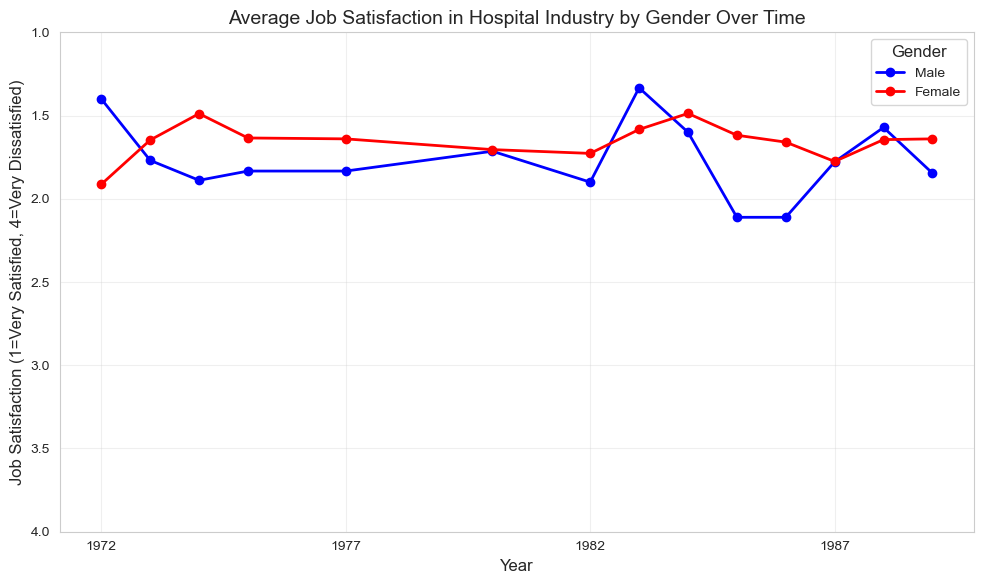

In [147]:
plt.figure(figsize=(10, 6))
if 'Male' in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data['Male'], marker='o', linewidth=2, 
             label='Male', color=male_color)
if 'Female' in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data['Female'], marker='o', linewidth=2, 
             label='Female', color=female_color)

plt.ylim(4, 1)
plt.title('Average Job Satisfaction in Hospital Industry by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Job Satisfaction (1=Very Satisfied, 4=Very Dissatisfied)')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
years_range = range(int(min(pivot_data.index)), int(max(pivot_data.index)) + 1, 5)
plt.xticks(years_range)
plt.tight_layout()
plt.savefig('line_plot_satisfaction_over_time.png')
plt.show()


The line plot reveals interesting trends in job satisfaction between male and female hospital workers over time. The plot shows that job satisfaction scores generally range between 1.5 and 2.0 (between "Very Satisfied" and "Moderately Satisfied"), indicating relatively high overall satisfaction. However, there are noticeable fluctuations and periods where gender differences become more pronounced.

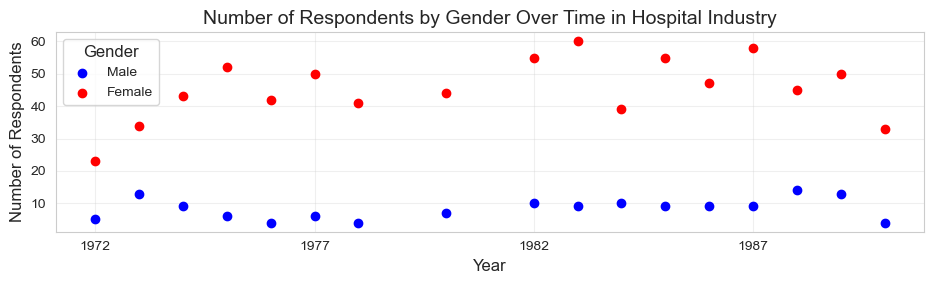

In [141]:
#Scatter plot - Number of respondents by gender over time 
plt.figure(figsize=(9.5, 3))

hospitals1_sorted['year'] = hospitals1_sorted['year'].astype(int)
hospitals2_sorted['year'] = hospitals2_sorted['year'].astype(int)

plt.scatter(hospitals1_sorted['year'], hospitals1_sorted['number'], 
            label='Male', color=male_color)
plt.scatter(hospitals2_sorted['year'], hospitals2_sorted['number'], 
            label='Female', color=female_color)

year_range = range(int(hospitals1_sorted['year'].min()), 
                  int(hospitals1_sorted['year'].max()) + 1, 5)
plt.xticks(year_range)

plt.xlabel('Year')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents by Gender Over Time in Hospital Industry')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('scatter_plot_respondents_by_gender.png')
plt.show()


The scatter plot shows that female respondents consistently outnumber male respondents across most survey years, which reflects the gender composition of the hospital workforce.


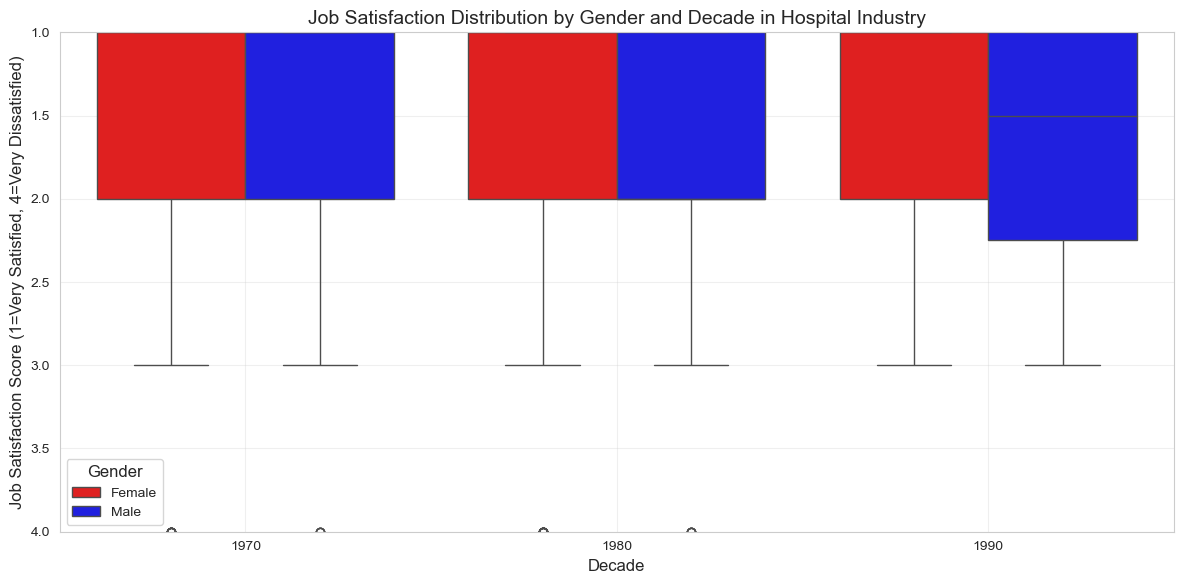

In [143]:
# Box plots - Job satisfaction by gender for each decade
# Create a decade column for grouping
hospital_data['decade'] = (hospital_data['year'] // 10) * 10
decades = sorted(hospital_data['decade'].unique())
plt.figure(figsize=(12, 6))
gender_palette = {
    'Male': male_color,
    'Female': female_color
}
ax = sns.boxplot(x='decade', y='job_satisfaction', hue='gender_label', 
                data=hospital_data, palette=gender_palette)
plt.ylim(4, 1)
plt.xticks(plt.xticks()[0], labels=[int(decade) for decade in decades])
plt.title('Job Satisfaction Distribution by Gender and Decade in Hospital Industry')
plt.xlabel('Decade')
plt.ylabel('Job Satisfaction Score (1=Very Satisfied, 4=Very Dissatisfied)')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('boxplot_satisfaction_by_decade_gender.png')
plt.show()


To better understand how job satisfaction patterns have evolved, we examined the distribution of satisfaction scores by gender across different decades using box plots.
The box plots reveal that:
There is considerable variation in satisfaction levels between the decade 1970-80 and 1990. 
In some decades, male hospital workers report slightly lower satisfaction than females.

In [105]:
# Final summary statistics

print("\nFinal Summary: Satisfaction Distribution by Gender")
satisfaction_distribution = hospital_data.groupby(['gender_label', 'satisfaction_label']).size().unstack().fillna(0)
display(satisfaction_distribution) 

print("\nDetailed Statistics of Job Satisfaction by Gender:")
job_sat_stats = hospital_data.groupby('gender_label')['job_satisfaction'].describe()
display(job_sat_stats)  


Final Summary: Satisfaction Distribution by Gender


satisfaction_label,A Little Dissatisfied,Moderately Satisfied,Very Dissatisfied,Very Satisfied
gender_label,,,,
Female,74,267,25,405
Male,15,49,9,68



Detailed Statistics of Job Satisfaction by Gender:


,count,mean,std,min,25%,50%,75%,max
gender_label,,,,,,,,
Female,771.0,1.635538,0.786729,1.0,1.0,1.0,2.0,4.0
Male,141.0,1.751773,0.887662,1.0,1.0,2.0,2.0,4.0


The analysis indicates subtle but persistent differences in job satisfaction between male and female hospital workers. While the overall satisfaction levels are relatively high for both groups, the patterns of these differences have evolved over time, potentially reflecting changing workplace dynamics, roles, and expectations in the hospital industry.

Areas for deeper analysis could include:

Controlling for specific roles within hospitals (doctors, nurses, administrators)

Examining the relationship between job satisfaction and factors like pay, work hours, and advancement opportunities

Analyzing how broader societal changes in gender norms and workplace policies have influenced these satisfaction patterns

In [108]:
#6. data to CSV files 
hospital_data.to_csv('hospital_industry_data.csv')
yearly_gender_satisfaction.to_csv('yearly_gender_satisfaction.csv')
pivot_data.reset_index().to_csv('pivot_data.csv')
hospitals1_sorted.to_csv('male_respondents_count.csv')
hospitals2_sorted.to_csv('female_respondents_count.csv')

## Uses of Python: Technical Components

_Fill in the table below with information about how you satisfied the technical requirements of the assignment._ 
    
| Component | Usage | Explanation | 
|:---|:---|:---|
| _leave this column as-is_ | _name the method(s)/ function(s) you used_ | _Use this area to explain what you were trying to achieve with this particular use of code and to describe why you chose to use this particular method or approach_ | 
| read data as DataFrame |`read_csv` | Used pandas' read_csv function to import the GSS dataset with index_col=0 to set the first column as the index. This efficiently loaded the structured data into a DataFrame for analysis. |
| helper function | `prepare_hospital_data`, `analyze_yearly_gender_counts`, `analyze_yearly_gender_satisfaction`| Created three custom helper functions to modularize the code and improve readability. Each function handles a specific task: data preparation, count analysis, and satisfaction analysis respectively. | 
| `groupby` with aggregation method |`groupby with agg, mean, count, size` |Used groupby to segment data by year and gender, then applied various aggregation methods to calculate statistics. For example, calculated mean job satisfaction and respondent counts for each gender in each year. | 
| `apply` method | `apply` function |Used apply twice to transform numeric codes into meaningful labels: converted gender codes (1,2) to 'Male'/'Female' and job satisfaction scores (1-4) to descriptive satisfaction levels | 
| `loc`, `iloc`, or `at`| `loc` | Used loc filtering in multiple places: to select hospital industry data (code 838), to filter data by specific years in the helper functions, and to separate male and female respondents. | 
| three utility methods (1) | `dropna` | Used dropna to remove missing values from the dataset, ensuring that subsequent analyses only included complete records with valid values for all required fields. | 
| three utility methods (2) | `astype` | Applied astype to convert column data types to integers, ensuring consistency in data types and proper handling of years, gender codes, and satisfaction scores. | 
| three utility methods (3) | `rename` | Used rename to change column names from technical codes to more meaningful names (e.g., 'sex' to 'gender', 'satjob' to 'job_satisfaction') for better readability. | 
| subset as `.csv` | `to_csv` | Exported multiple datasets as CSV files including the filtered hospital data, yearly gender satisfaction data, and respondent counts, preserving the processed data for future use or sharing. | 
| one scatter plot | `plt.scatter` | Created a scatter plot to visualize the number of male and female respondents over time, revealing the gender composition of hospital workers across survey years. | 
| one line plot | `plt.plot`  | Generated a line plot to track average job satisfaction levels by gender over time, showing trends and highlighting periods where gender differences were more pronounced. | 
| one sequence of boxplots | `sns.boxplot` | Produced a series of boxplots showing the distribution of job satisfaction scores by gender across different decades, revealing how satisfaction patterns have evolved over time.
 |  

## Uses of Python: Reflection          

Modularity and Reusability: We created three custom helper functions to handle specific tasks rather than writing monolithic code blocks. This approach not only made the code more readable but also more maintainable and reusable. Each function serves a distinct purpose: data preparation, count analysis, and satisfaction analysis.

Data Transformation Strategy: We chose to create new columns with meaningful labels (e.g., 'gender_label', 'satisfaction_label') rather than overwriting the original numeric codes. This preserved the original data while making the dataset more interpretable for analysis and visualization. The apply method with lambda functions (we had to take help from various resources on google to use this function) provided a clean, concise way to implement these transformations.

We intentionally used a consistent color scheme (blue for males, red for females) across all visualizations to maintain visual coherence.
The scatter plot shows demographic representation
The line plot reveals temporal trends
The box plots display distribution patterns

Performance Considerations: For filtering operations, we used loc indexing rather than boolean indexing (e.g., df[df['column'] == value]) as it tends to be more efficient for large datasets. The code also effectively uses groupby operations to minimize iteration through the dataset, leveraging pandas' optimized data structures.

Reproducibility: We set consistent styling parameters at the beginning of the visualization section and saved all plots as image files, ensuring that the visualizations could be reproduced exactly and shared easily. Additionally, exporting processed data as CSV files enables others to verify and build upon these analyses.

One tradeoff we made was prioritizing code clarity over ultimate computational efficiency in some instances. For example, the yearly gender count analysis could potentially be implemented in fewer lines with pivot operations, but I opted for an approach that was more explicit and easier to follow.



## References              

Smith, T. W., Davern, M., Freese, J., & Morgan, S. L. (2019). General Social Surveys, 1972-2018. Principal Investigator, Smith, T. W.; Co-Principal Investigators, Davern, M., Freese, J., and Morgan, S. L.; Sponsored by National Science Foundation. NORC ed. Chicago: NORC at the University of Chicago.
McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51-56.
Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95.
Waskom, M. L. (2021). Seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.